In [1]:
from visualization_utils import *

In [2]:
stats = build_train_stats("logs_test/")

# Labeled / pseudo-labeled / unlabeled data proportion

In [40]:
import numpy as np
count_labeled = [iter_stats.data_stats_at_beginning.count_labeled for iter_stats in stats.stats]
count_labeled.append(stats.stats[-1].data_stats_at_end.count_labeled)
initial_count_labels = count_labeled[0]

count_pseudo_labeled = [count_labeled[i] - count_labeled[i - 1] for i in range(1, len(count_labeled))]
count_pseudo_labeled.insert(0, 0)

count_unlabeled = [iter_stats.data_stats_at_beginning.count_unlabeled for iter_stats in stats.stats]
count_unlabeled.append(stats.stats[-1].data_stats_at_end.count_unlabeled)

iteration_keys = [str(iter_stats.iteration) for iter_stats in stats.stats]
iteration_keys.insert(0, "start")

print(count_labeled)
print(count_pseudo_labeled)
print(count_unlabeled)
print(iteration_keys)

[1000, 1692, 2462, 2520]
[0, 692, 770, 58]
[2000, 1308, 538, 480]
['start', '1', '2', '3']


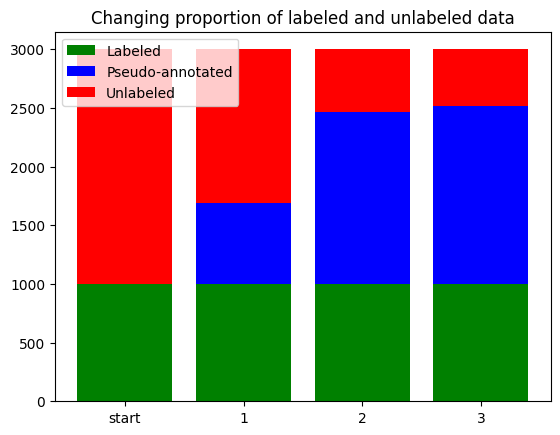

In [41]:
import matplotlib.pyplot as plt

labeled = np.array([initial_count_labels] * len(iteration_keys))
pseudo_labeled = np.array([sum(count_pseudo_labeled[:i + 1]) for i in range(len(count_pseudo_labeled))])
unlabeled = np.array(count_unlabeled)

plt.bar(iteration_keys, labeled, color='g', label="Labeled")
plt.bar(iteration_keys, pseudo_labeled, bottom=labeled, color='b', label="Pseudo-annotated")
plt.bar(iteration_keys, unlabeled, bottom=labeled + pseudo_labeled, color='r', label="Unlabeled")
plt.legend()
plt.title("Changing proportion of labeled and unlabeled data")
plt.show()

# Labeled data proportion relative to accuracy score

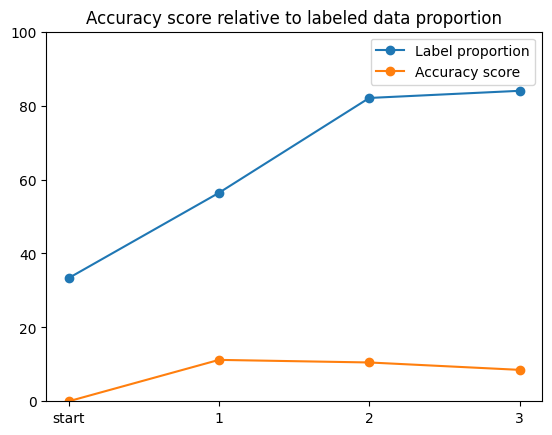

In [61]:
labeled_data_percentages = np.array(count_labeled) / (np.array(count_labeled) + np.array(count_unlabeled)) * 100
accuracies = np.array([0] + [stat.accuracy for stat in stats.stats])

plt.plot(iteration_keys, labeled_data_percentages, marker="o", label="Label proportion")
plt.plot(iteration_keys, accuracies, marker="o", label="Accuracy score")
plt.legend()
plt.title("Accuracy score relative to labeled data proportion")
plt.ylim(0, 100)
plt.show()

# Iteration-based loss-value changes

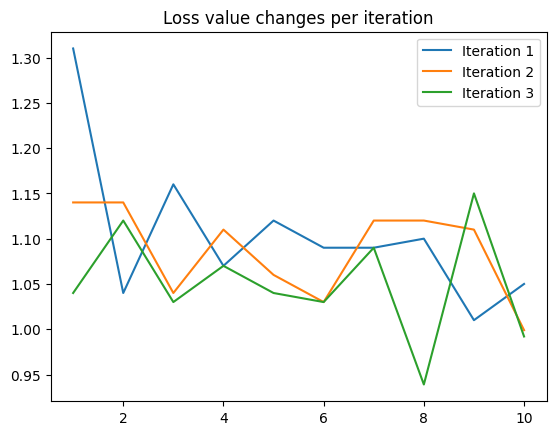

In [59]:
n_epoch = len(stats.stats[0].loss)
for stat in stats.stats:
    plt.plot(range(1, n_epoch + 1), stat.loss, label=f'Iteration {stat.iteration}')
plt.legend()
plt.title("Loss value changes per iteration")
plt.show()